In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/smart_grid.zip'

Archive:  /content/drive/MyDrive/smart_grid.zip
  inflating: smart_grid_stability_augmented.csv  


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
data = pd.read_csv('smart_grid_stability_augmented.csv')
data = data.dropna()
targets = data['stabf'].values
label_encoder = LabelEncoder()
targets = label_encoder.fit_transform(targets)
data = data.drop(['stabf'], axis=1)
data

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,2.930406,2.376523,9.487627,6.187797,3.343416,-1.449106,-0.658054,-1.236256,0.601709,0.813512,0.779642,0.608385,0.023892
59996,3.392299,2.954947,1.274827,6.894759,4.349512,-0.952437,-1.663661,-1.733414,0.502079,0.285880,0.567242,0.366120,-0.025803
59997,2.364034,8.776391,2.842030,1.008906,4.299976,-0.943884,-1.380719,-1.975373,0.487838,0.149286,0.986505,0.145984,-0.031810
59998,9.631511,2.757071,3.994398,7.821347,2.514755,-0.649915,-0.966330,-0.898510,0.365246,0.889118,0.587558,0.818391,0.037789


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, targets, test_size=0.1, random_state=42, shuffle=True)
print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

54000 54000
6000 6000


In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
# k-nearest model
knn_model = KNeighborsClassifier(n_neighbors=5)

def trainTheKNModel():
  # train the model using the training set

  knn_model.fit(X_train, y_train)

  # test the model using test data
  yPred = knn_model.predict(X_test)

  # Metrics of the model
  accuracy = accuracy_score(y_test, yPred)
  recall = recall_score(y_test, yPred)
  precision = precision_score(y_test, yPred)
  f1 = f1_score(y_test, yPred)

  return accuracy, recall, precision, f1, yPred

In [ ]:
accuracy, recall, precision, f1, yPred = trainTheKNModel()
print(classification_report(yPred, y_test))
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("f1 score:", f1)

              precision    recall  f1-score   support

           0       0.73      0.79      0.76      1992
           1       0.89      0.85      0.87      4008

    accuracy                           0.83      6000
   macro avg       0.81      0.82      0.81      6000
weighted avg       0.84      0.83      0.83      6000

Accuracy: 0.8321666666666667
Precision: 0.8547904191616766
Recall: 0.8896390547909634
f1 score: 0.8718666497009798


[0.8321666666666667, 0.8547904191616766, 0.8896390547909634, 0.8718666497009798]


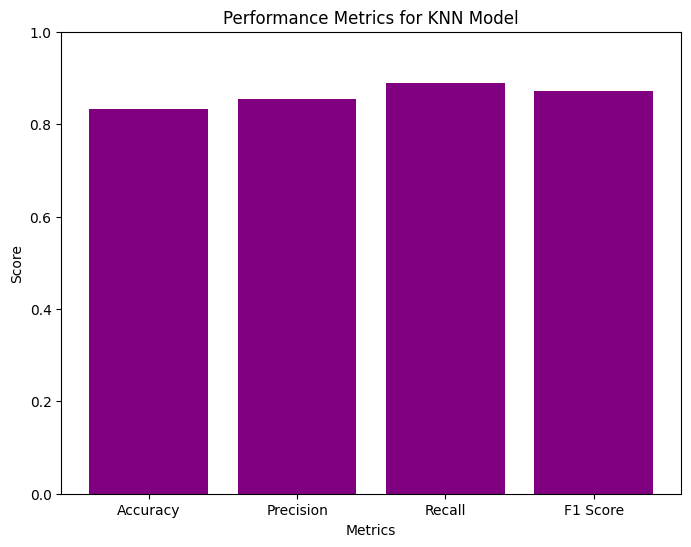

In [ ]:
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

print(values)

# Plotting the graph
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['purple', 'purple', 'purple', 'purple'])
plt.title('Performance Metrics for KNN Model')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limits to range from 0 to 1
plt.show()

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

def trainTheRFModel():
  # train the model using the training set
  rf_model.fit(X_train, y_train)

  # test the model using test data
  yPred = rf_model.predict(X_test)

  # Metrics of the model
  accuracy = accuracy_score(y_test, yPred)
  recall = recall_score(y_test, yPred)
  precision = precision_score(y_test, yPred)
  f1 = f1_score(y_test, yPred)

  return accuracy, recall, precision, f1, yPred

In [ ]:
accuracy, recall, precision, f1, yPred = trainTheRFModel()
print(classification_report(yPred, y_test))
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("f1_score:", f1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2149
           1       1.00      1.00      1.00      3851

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
f1_score: 1.0


[1.0, 1.0, 1.0, 1.0]


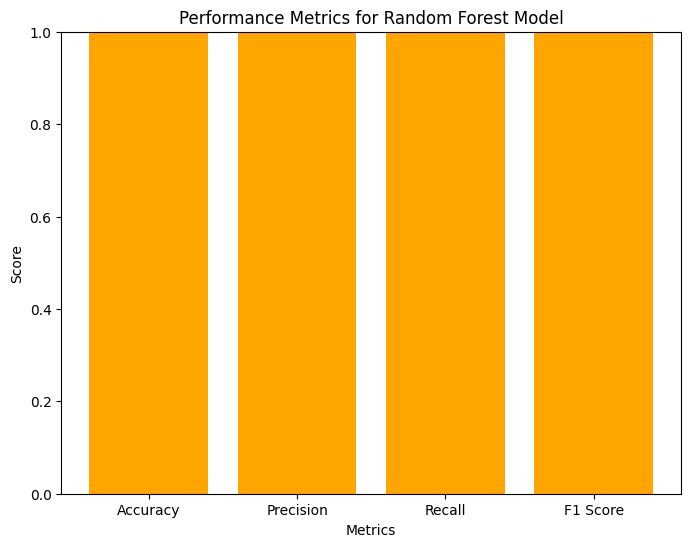

In [ ]:
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

print(values)

# Plotting the graph
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['orange', 'orange', 'orange', 'orange'])
plt.title('Performance Metrics for Random Forest Model')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limits to range from 0 to 1
plt.show()

In [ ]:
svm_classifier = SVC(kernel='linear')

def trainTheSVMModel():
  # Train the SVM classifier
  svm_classifier.fit(X_train, y_train)

  # Make predictions on the test set
  yPred = svm_classifier.predict(X_test)


  # Metrics of the model
  accuracy = accuracy_score(y_test, yPred)
  recall = recall_score(y_test, yPred)
  precision = precision_score(y_test, yPred)
  f1 = f1_score(y_test, yPred)

  return accuracy, recall, precision, f1, yPred

In [ ]:
accuracy, recall, precision, f1, yPred = trainTheSVMModel()
print(classification_report(yPred, y_test))
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("f1_score:", f1)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2133
           1       0.99      0.99      0.99      3867

    accuracy                           0.99      6000
   macro avg       0.98      0.99      0.98      6000
weighted avg       0.99      0.99      0.99      6000

Accuracy: 0.986
Precision: 0.987070080165503
Recall: 0.991171124383277
f1_score: 0.9891163513863696


[0.986, 0.987070080165503, 0.991171124383277, 0.9891163513863696]


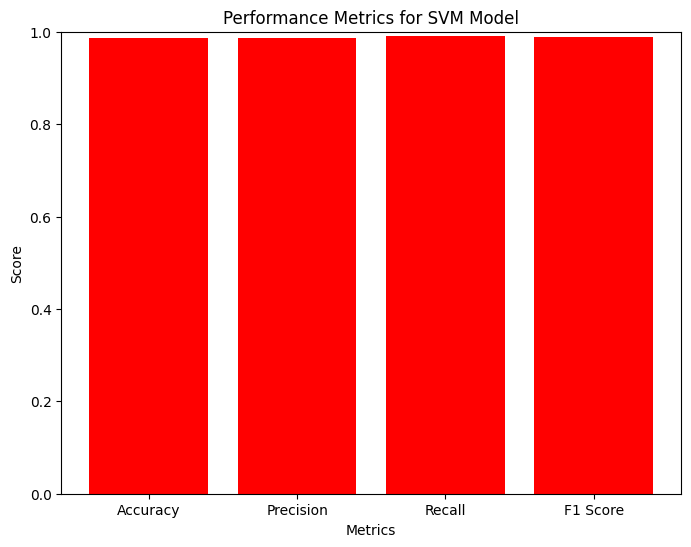

In [ ]:
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

print(values)

# Plotting the graph
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['red', 'red', 'red', 'red'])
plt.title('Performance Metrics for SVM Model')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limits to range from 0 to 1
plt.show()

In [ ]:
# Initialize the logistic regression model
logistic_reg = LogisticRegression()

def trainTheLogisticModel():
  # Train the model on the training data
  logistic_reg.fit(X_train, y_train)

  # Make predictions on the testing data
  yPred = logistic_reg.predict(X_test)

  # Metrics of the model
  accuracy = accuracy_score(y_test, yPred)
  recall = recall_score(y_test, yPred)
  precision = precision_score(y_test, yPred)
  f1 = f1_score(y_test, yPred)

  return accuracy, recall, precision, f1, yPred

In [ ]:
accuracy, recall, precision, f1, yPred = trainTheLogisticModel()
print(classification_report(yPred, y_test))
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("f1_score:", f1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2152
           1       1.00      1.00      1.00      3848

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000

Accuracy: 0.9995
Precision: 1.0
Recall: 0.9992209815632304
f1_score: 0.9996103390050656


[0.9995, 1.0, 0.9992209815632304, 0.9996103390050656]


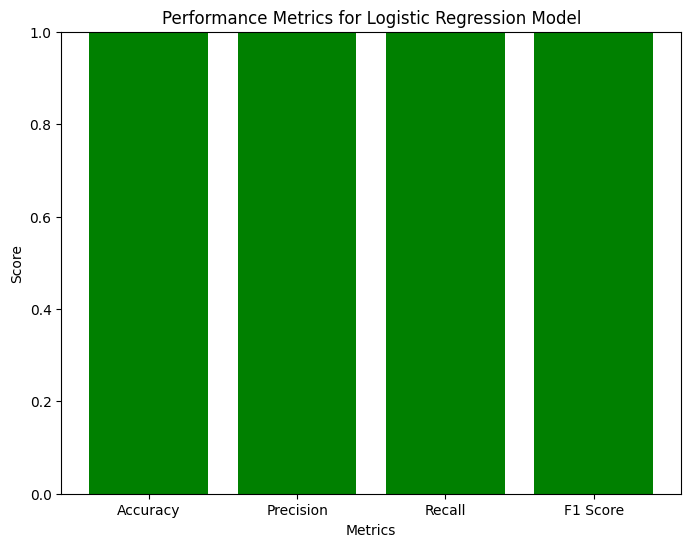

In [ ]:
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

print(values)

# Plotting the graph
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['green', 'green', 'green', 'green'])
plt.title('Performance Metrics for Logistic Regression Model')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limits to range from 0 to 1
plt.show()

In [ ]:
clf = DecisionTreeClassifier()

def trainTheTreeModel():
  # Train the classifier on the training data
  clf.fit(X_train, y_train)

  # Make predictions on the testing data
  yPred = clf.predict(X_test)

  # acuraccy of the model
  accuracy = accuracy_score(y_test, yPred)
  recall = recall_score(y_test, yPred)
  precision = precision_score(y_test, yPred)
  f1 = f1_score(y_test, yPred)

  return accuracy, recall, precision, f1, yPred

In [ ]:
accuracy, recall, precision, f1, yPred = trainTheTreeModel()
print(classification_report(yPred, y_test))
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("f1_score:", f1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2149
           1       1.00      1.00      1.00      3851

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
f1_score: 1.0


[1.0, 1.0, 1.0, 1.0]


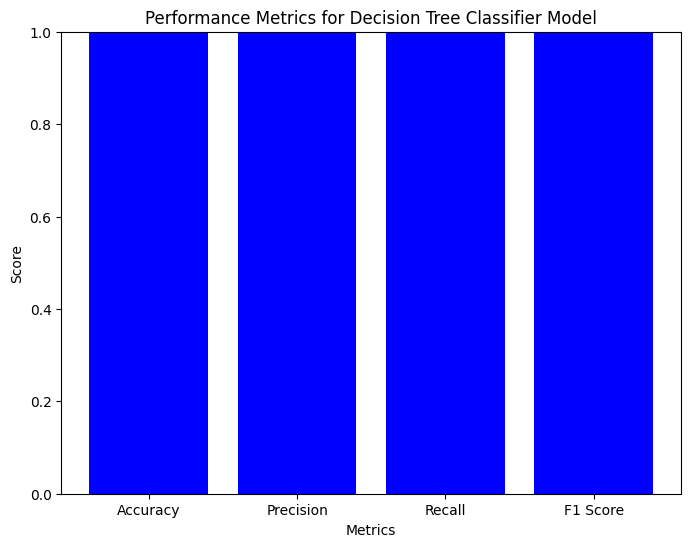

In [ ]:
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

print(values)

# Plotting the graph
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['blue', 'blue', 'blue', 'blue'])
plt.title('Performance Metrics for Decision Tree Classifier Model')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limits to range from 0 to 1
plt.show()